In [1]:
import pandas as pd
import numpy as np
import scipy
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
bigdf = pd.read_csv('D:/Prog/ML/Large dataset/interesting data sets/MMD_DS_test.csv')

In [3]:
bigdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984477 entries, 0 to 984476
Data columns (total 2 columns):
CDR_TEXT    984476 non-null object
labels      984477 non-null object
dtypes: object(2)
memory usage: 15.0+ MB


In [4]:
bigdf.head(10)

,CDR_TEXT,labels
0,FELIZ ANIVERSARIO TAIANE!Agende o seu retorno ...,spam
1,Your iROKOtv verification code is 2920,spam
2,Enjoy two epic offers at asc-ply.com/AS: A 100...,spam
3,olsun dileklerimizle. ANADOLU SİGORTA https:/...,spam
4,85254 is Your Yahoo Account Key,spam
5,Danny We have you Approved. Please call us imm...,spam
6,Cash payout of MK 2330000 from account: 263851...,spam
7,.لما تروح ركب دولاب شهد واغسل باقى البسطاتات م...,spam
8,<#> ‏55008‏ هو رمز فيسبوك الخاص بك Laz+nxCarLW,spam
9,Unsubscribe: https://ig.me/w/1Ks06aa5zchffKn,spam


In [5]:
def standardize_text(df):
    '''Removal all unusefull character
    df: Series that we will clean'''
    df = df.str.replace('\s+', ' ') #removal 2 and more spaces 
    df = df.str.replace('\.+', '.') #removal 2 and more dots
    df = df.str.replace(r"http\S+", "URL") #we don't need exactly URL so change them on 'url'
    special_char_list = [':', ';', '?', '}', ')', '{', '(', '!', ',', "'"] #remocal all specil_char
    for special_char in special_char_list: 
        df=df.str.replace(special_char, '')
    df = df.str.lower() #change all characters to lower case
    return df

bigdf['CDR_TEXT'] = standardize_text(bigdf['CDR_TEXT'])
bigdf = bigdf.dropna()
bigdf.head(50)

,CDR_TEXT,labels
0,feliz aniversario taianeagende o seu retorno n...,spam
1,your irokotv verification code is 2920,spam
2,enjoy two epic offers at asc-ply.com/as a 100%...,spam
3,olsun dileklerimizle. anadolu si̇gorta url,spam
4,85254 is your yahoo account key,spam
5,danny we have you approved. please call us imm...,spam
6,cash payout of mk 2330000 from account 2638519...,spam
7,.لما تروح ركب دولاب شهد واغسل باقى البسطاتات م...,spam
8,<#> ‏55008‏ هو رمز فيسبوك الخاص بك laz+nxcarlw,spam
9,unsubscribe url,spam


In [6]:
bigdf['labels'] = bigdf['labels'].map({'spam':0,'normal':1}) #change columns labels for using it like target
bigdf.head()

,CDR_TEXT,labels
0,feliz aniversario taianeagende o seu retorno n...,0
1,your irokotv verification code is 2920,0
2,enjoy two epic offers at asc-ply.com/as a 100%...,0
3,olsun dileklerimizle. anadolu si̇gorta url,0
4,85254 is your yahoo account key,0


In [7]:
bigdf.groupby("labels").count()

,CDR_TEXT
labels,
0,89939
1,894537


In [8]:
bigdf["tokens"] = bigdf["CDR_TEXT"].apply(nltk.tokenize.word_tokenize)

In [9]:
#let's see histogram of words count
all_words = [word for tokens in bigdf["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in bigdf["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

18610092 words total, with a vocabulary size of 245596
Max sentence length is 127


In [10]:
import matplotlib.pyplot as plt

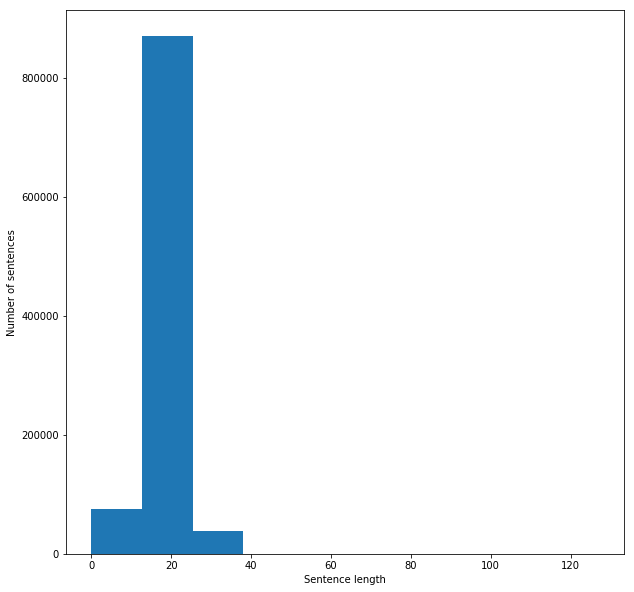

In [11]:
#plot histogram
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [12]:
# here i just wanted to create some interesting features and understand database
bigdf['len_sent'] = pd.Series(sentence_lengths)
bigdf = bigdf.dropna()

In [13]:
import seaborn as sns

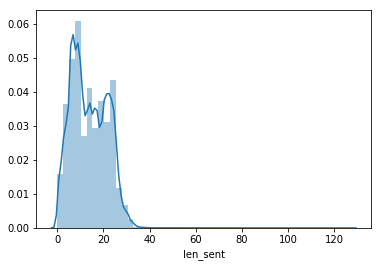

In [14]:
sns.distplot(bigdf[bigdf['labels'] == 0]['len_sent'])

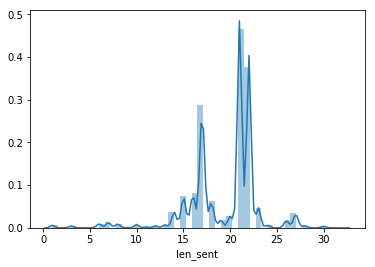

In [15]:
sns.distplot(bigdf[(bigdf['len_sent'] < 35) & (bigdf['labels'] == 1)]['len_sent'])

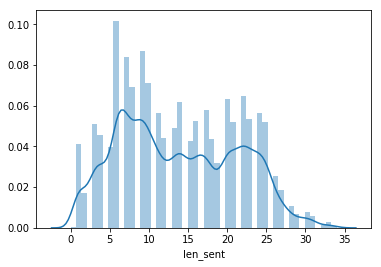

In [16]:
sns.distplot(bigdf[(bigdf['len_sent'] < 35) & (bigdf['labels'] == 0)]['len_sent'])

In [17]:
len(bigdf[(bigdf['len_sent'] > 30) & (bigdf['labels'] == 1)]['len_sent'])

10

In [18]:
len(bigdf[(bigdf['len_sent'] > 30) & (bigdf['labels'] == 0)]['len_sent'])

751

In [19]:
len(bigdf[(bigdf['len_sent'] < 1) & (bigdf['labels'] == 0)]['len_sent'])

19

In [20]:
len(bigdf[(bigdf['len_sent'] < 1) & (bigdf['labels'] == 1)]['len_sent'])

0

In [21]:
bigdf.head(2)

,CDR_TEXT,labels,tokens,len_sent
0,feliz aniversario taianeagende o seu retorno n...,0,"[feliz, aniversario, taianeagende, o, seu, ret...",20.0
1,your irokotv verification code is 2920,0,"[your, irokotv, verification, code, is, 2920]",6.0


In [22]:
#lets create some models for classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = bigdf['CDR_TEXT'].tolist()
list_labels = bigdf['labels'].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=79)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [23]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

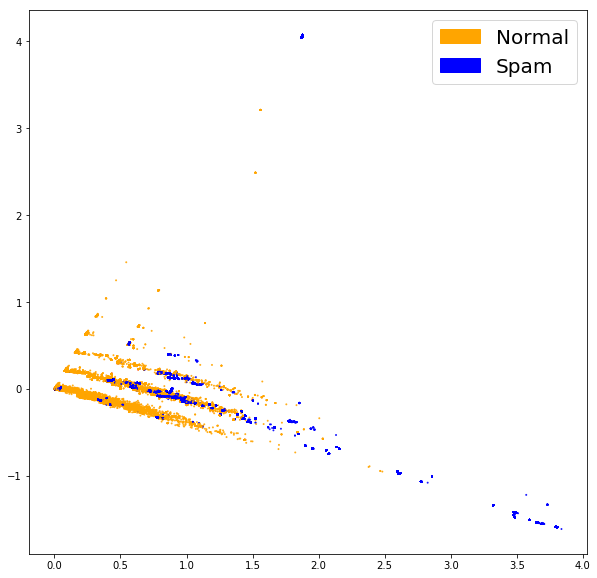

In [24]:
#lets see can normal and spam messages split into clear cluster
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    colors = ['orange','blue']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=1, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        red_patch = mpatches.Patch(color='orange', label='Normal')
        green_patch = mpatches.Patch(color='blue', label='Spam')
        plt.legend(handles=[red_patch, green_patch], prop={'size': 20})

fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_counts, y_train)
plt.show()
#(of course not, but we can see that some of them are located much further)

In [25]:
#Lets use most easy model - linear model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30, n_jobs=-1, random_state=79)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

D:\Prog\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return round(accuracy,5), round(precision,5), round(recall,5), round(f1,5)

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print(f"accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}")

accuracy = 0.99917, precision = 0.99917, recall = 0.99917, f1 = 0.99917


In [28]:
#result is perfect, but i want to show you that i can work with other models)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import time

In [30]:
lr = LogisticRegression()
svm = LinearSVC()
sgd = SGDClassifier()
svm_rbf = SVC() #work very slow, we will not use it
knn = KNeighborsClassifier() #work very slow, we will not use it
rf = RandomForestClassifier()
perc = Perceptron()

In [31]:
mas_of_result = list()
zoo = [(lr, 'Logistic Regression'), (sgd, 'SGD'), (svm, 'SVM'), (rf, 'Random Forests'), (perc, 'Perceptron')]
for model, name in zoo:
    start_time = time.time()
    model.fit(X_train_counts, y_train)
    y_predicted_counts = model.predict(X_test_counts)
    mas_of_result.append(get_metrics(y_test, y_predicted_counts))
    print(f"{name}      {time.time() - start_time}s seconds ---")
for i in range(len(mas_of_result)):
    print(f'Model:{zoo[i][1]}. Accuracy={mas_of_result[i][0]}. Precision={mas_of_result[i][1]}. Recall={mas_of_result[i][1]}. F1={mas_of_result[i][1]}')

Logistic Regression      20.979977130889893s seconds ---
SGD      2.548417806625366s seconds ---
SVM      74.33485674858093s seconds ---
Random Forests      128.4929871559143s seconds ---
Perceptron      3.1056694984436035s seconds ---
Model:Logistic Regression. Accuracy=0.99902. Precision=0.99903. Recall=0.99903. F1=0.99903
Model:SGD. Accuracy=0.99853. Precision=0.99854. Recall=0.99854. F1=0.99854
Model:SVM. Accuracy=0.99918. Precision=0.99918. Recall=0.99918. F1=0.99918
Model:Random Forests. Accuracy=0.99922. Precision=0.99923. Recall=0.99923. F1=0.99923
Model:Perceptron. Accuracy=0.99912. Precision=0.99912. Recall=0.99912. F1=0.99912


In [ ]:
#Perceptron working faster and the result is equel to SGD, but Perceptron scores little bit better, so lets use Perceptron, 
#but logistic Regression we can interpret

In [ ]:
#lets see most important words for logistic regression relevance and understand how work classification 

In [32]:
#creating most important words
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

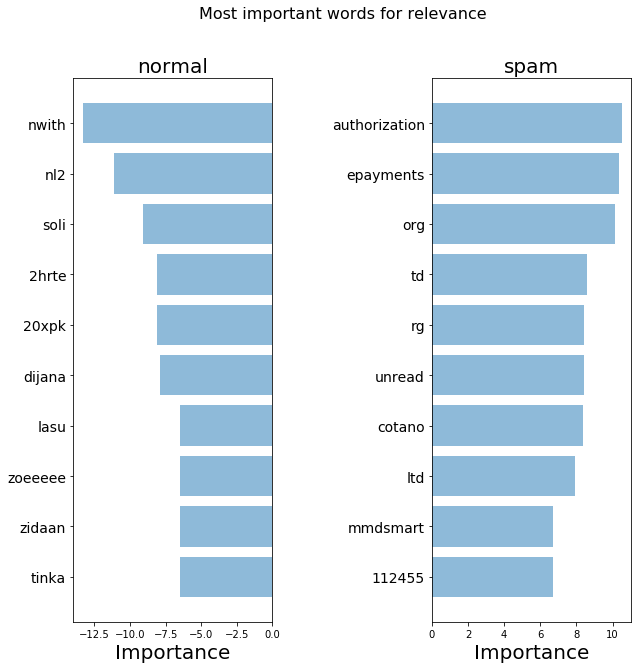

In [33]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('normal', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('spam', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")